In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

observations = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')


In [3]:
#Inspecting Observations dataset
print(observations.head(10))
print(observations.info())

                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   
7                  Elymus multisetus  Great Smoky Mountains National Park   
8             Lysimachia quadrifolia               Yosemite National Park   
9         Diphyscium cumberlandianum            Yellowstone National Park   

   observations  
0            68  
1            77  
2           138  
3            84  
4            85  
5           112  
6           228  
7       

In [4]:
#Inspecting Species dataset
print(species.head())
print(species.info())
print(species.conservation_status.unique())

#Replace n/a values with 'Least Concern' for species groups that are plentiful according to the
#International Union for Conservation of Nature (IUCN)
species.conservation_status.fillna('Least Concern', inplace=True)
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      

In [5]:
#Exploring duplicates in species dataset
print(species[species.scientific_name.duplicated(keep=False)])

s_duplicates = species[species.scientific_name.duplicated(keep=False)]
print(f'Duplicates: {len(s_duplicates)}')

# Create a dataframe with the count of duplicate rows by scientific_name
duplicate_count = s_duplicates.groupby(['scientific_name']).conservation_status.count()

# Print the scientific_names with the highest duplicate counts and review the conservation_status
for name, status in duplicate_count.iteritems():
    if int(status) > 2:
        display(s_duplicates[s_duplicates.scientific_name == name])


            category                   scientific_name  \
4             Mammal                    Cervus elaphus   
5             Mammal            Odocoileus virginianus   
6             Mammal                        Sus scrofa   
8             Mammal                       Canis lupus   
10            Mammal          Urocyon cinereoargenteus   
...              ...                               ...   
5619  Vascular Plant  Panicum rigidulum var. rigidulum   
5638  Vascular Plant                    Setaria pumila   
5640  Vascular Plant                  Vulpia bromoides   
5643  Vascular Plant                     Vulpia myuros   
5750  Vascular Plant                   Rosa eglanteria   

                                           common_names conservation_status  
4                                         Wapiti Or Elk       Least Concern  
5                                     White-Tailed Deer       Least Concern  
6                                   Feral Hog, Wild Pig       Least C

,category,scientific_name,common_names,conservation_status
8,Mammal,Canis lupus,Gray Wolf,Endangered
3020,Mammal,Canis lupus,"Gray Wolf, Wolf",In Recovery
4448,Mammal,Canis lupus,"Gray Wolf, Wolf",Endangered


,category,scientific_name,common_names,conservation_status
49,Mammal,Castor canadensis,"American Beaver, Beaver",Least Concern
3050,Mammal,Castor canadensis,American Beaver,Least Concern
4475,Mammal,Castor canadensis,Beaver,Least Concern


,category,scientific_name,common_names,conservation_status
156,Bird,Columba livia,Rock Dove,Least Concern
3138,Bird,Columba livia,"Common Pigeon, Rock Dove, Rock Pigeon",Least Concern
4513,Bird,Columba livia,Rock Pigeon,Least Concern


,category,scientific_name,common_names,conservation_status
2242,Vascular Plant,Holcus lanatus,"Common Velvet Grass, Velvetgrass",Least Concern
4236,Vascular Plant,Holcus lanatus,"Common Velvetgrass, Yorkshire-Fog",Least Concern
5600,Vascular Plant,Holcus lanatus,"Common Velvetgrass, Velvetgrass, Yorkshire Fog",Least Concern


,category,scientific_name,common_names,conservation_status
858,Vascular Plant,Hypochaeris radicata,"Cat's Ear, Spotted Cat's-Ear",Least Concern
3488,Vascular Plant,Hypochaeris radicata,"Spotted Cats-Ear, Hairy Cats-Ear, Gosmore",Least Concern
4799,Vascular Plant,Hypochaeris radicata,"Common Cat's-Ear, False Dandelion, Frogbit, Go...",Least Concern


,category,scientific_name,common_names,conservation_status
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern
3042,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis, Little ...",Species of Concern
4467,Mammal,Myotis lucifugus,Little Brown Myotis,Species of Concern


,category,scientific_name,common_names,conservation_status
26,Mammal,Procyon lotor,"Common Raccoon, Raccoon",Least Concern
3030,Mammal,Procyon lotor,"Common Raccoon, Northern Raccoon, Raccoon",Least Concern
4459,Mammal,Procyon lotor,Raccoon,Least Concern


,category,scientific_name,common_names,conservation_status
16,Mammal,Puma concolor,Panther (Mountain Lion),Least Concern
3022,Mammal,Puma concolor,"Cougar, Mountain Lion, Puma",Least Concern
4451,Mammal,Puma concolor,Mountain Lion,Least Concern


,category,scientific_name,common_names,conservation_status
3077,Bird,Streptopelia decaocto,Eurasian Collared-Dove,Least Concern
3140,Bird,Streptopelia decaocto,"Eurasian Collared Dove, Eurasian Collared-Dove",Least Concern
4514,Bird,Streptopelia decaocto,Eurasian Collared Dove,Least Concern


In [6]:
#Removing duplicates in species dataset
species.drop_duplicates(inplace=True, subset='scientific_name', keep='last')
species.reset_index(drop=True, inplace=True)

print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                  Canis latrans   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole       Least Concern  
1                              American Bison, Bison       Least Concern  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...       Least Concern  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)       Least Concern  
4                                             Coyote  Species of Concern  


In [7]:
# Create categorical values for conservation_status column to be used
# for sorting and data manipulation
species.conservation_status = pd.Categorical(species.conservation_status, 
                                            categories=['Least Concern', 'Species of Concern', 
                                            'In Recovery', 'Threatened', 'Endangered'], 
                                            ordered=True)

In [12]:
#Merging both datasets together
observations = pd.merge(observations, species, left_on='scientific_name', 
                        right_on='scientific_name', how='left')
observations = observations[['scientific_name', 'park_name', 'observations', 
                            'category', 'conservation_status']]

print(observations.head(10))

                     scientific_name                            park_name  \
0                 Vicia benghalensis  Great Smoky Mountains National Park   
1                     Neovison vison  Great Smoky Mountains National Park   
2                  Prunus subcordata               Yosemite National Park   
3               Abutilon theophrasti                  Bryce National Park   
4           Githopsis specularioides  Great Smoky Mountains National Park   
5  Elymus virginicus var. virginicus               Yosemite National Park   
6                   Spizella pusilla            Yellowstone National Park   
7                  Elymus multisetus  Great Smoky Mountains National Park   
8             Lysimachia quadrifolia               Yosemite National Park   
9         Diphyscium cumberlandianum            Yellowstone National Park   

   observations           category conservation_status  
0            68     Vascular Plant       Least Concern  
1            77             Mammal    

In [14]:
observations.category.value_counts()

Vascular Plant       17880
Bird                  2084
Nonvascular Plant     1332
Mammal                 856
Fish                   508
Amphibian              320
Reptile                316
Name: category, dtype: int64

In [16]:
observations.park_name.value_counts()

Great Smoky Mountains National Park    5824
Bryce National Park                    5824
Yellowstone National Park              5824
Yosemite National Park                 5824
Name: park_name, dtype: int64

In [19]:
observations.conservation_status.value_counts()

Least Concern         22528
Species of Concern      644
Endangered               68
Threatened               44
In Recovery              12
Name: conservation_status, dtype: int64

Text(0.5, 1.0, 'Number of observations by category')

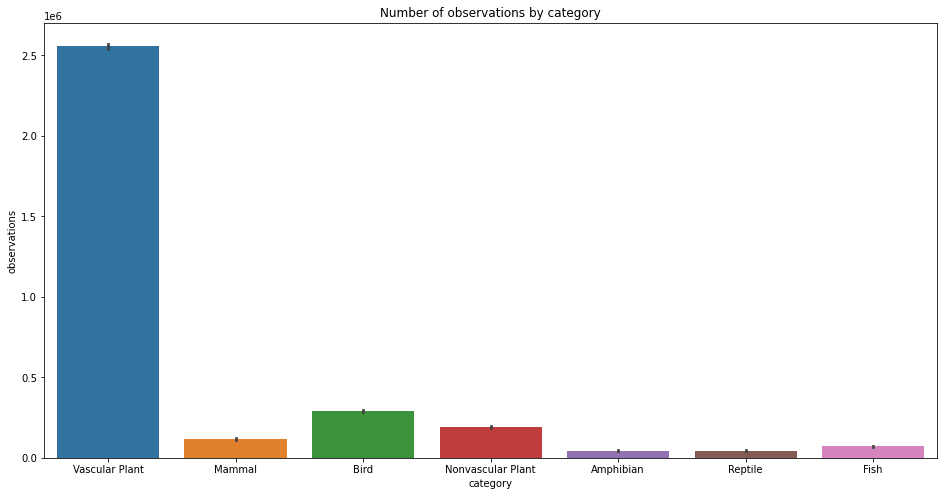

In [21]:
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='category', y='observations', data=observations, estimator=np.sum)
plt.title('Number of observations by category')

Text(0.5, 1.0, 'Number of observations for each categories by park')

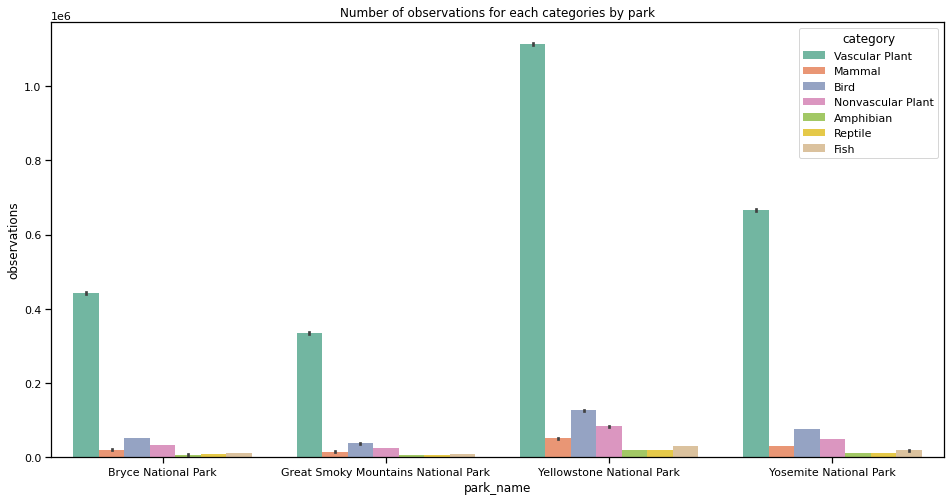

In [23]:
order = ['Bryce National Park', 'Great Smoky Mountains National Park', 'Yellowstone National Park', 'Yosemite National Park']
sns.set_palette('Set2')
sns.set_context('notebook')
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='park_name', y='observations', data=observations, hue='category', estimator=np.sum, order=order)
plt.title('Number of observations for each categories by park')

Text(0.5, 1.0, 'Number of observations for each park by category')

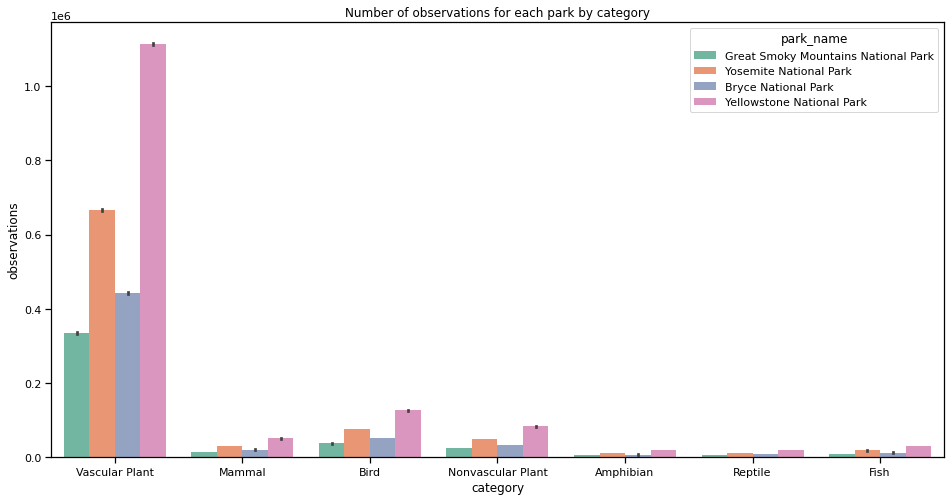

In [25]:
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='category', y='observations', data=observations, hue='park_name', estimator=np.sum)
plt.title('Number of observations for each park by category')

Text(0.5, 1.0, 'Number of observations for each conservation status by park')

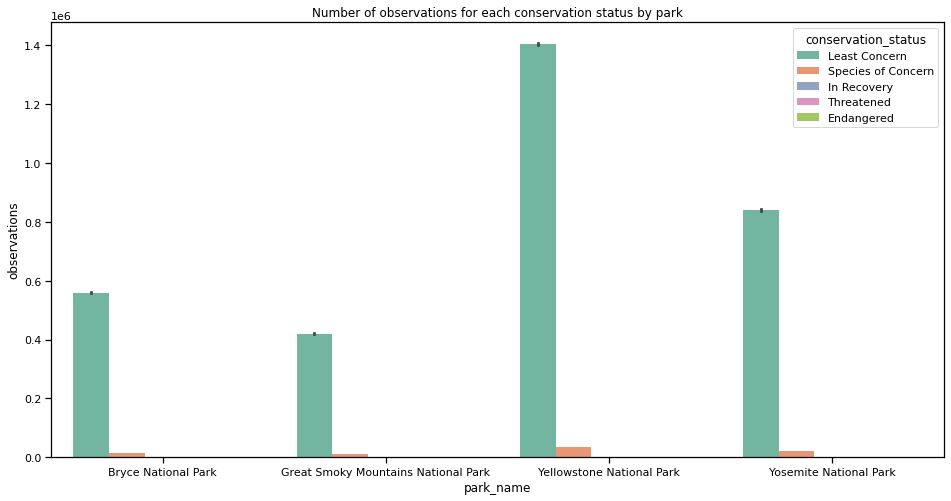

In [27]:
fig = plt.figure(figsize=(16, 8))
sns.barplot(x='park_name', y='observations', data=observations, hue='conservation_status', estimator=np.sum, order=order)
plt.title('Number of observations for each conservation status by park')

Text(0.5, 1.0, 'Distribution of observations by conservation status')

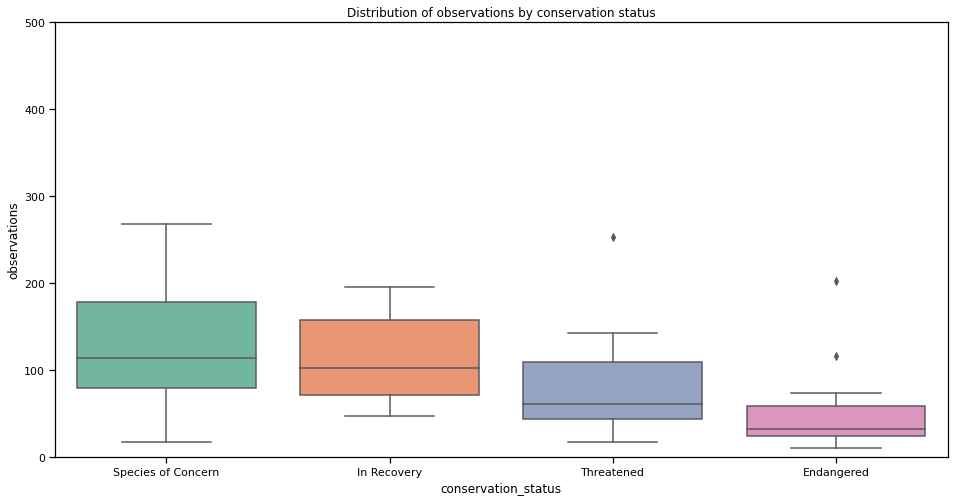

In [28]:
fig = plt.figure(figsize=(16, 8))
order = ['Species of Concern', 'In Recovery', 'Threatened', 'Endangered']
sns.boxplot(x='conservation_status', y='observations', data=observations, order=order)
plt.ylim(0, 500)
plt.title('Distribution of observations by conservation status')

Text(0.5, 1.0, 'Distribution of categories by conservation status')

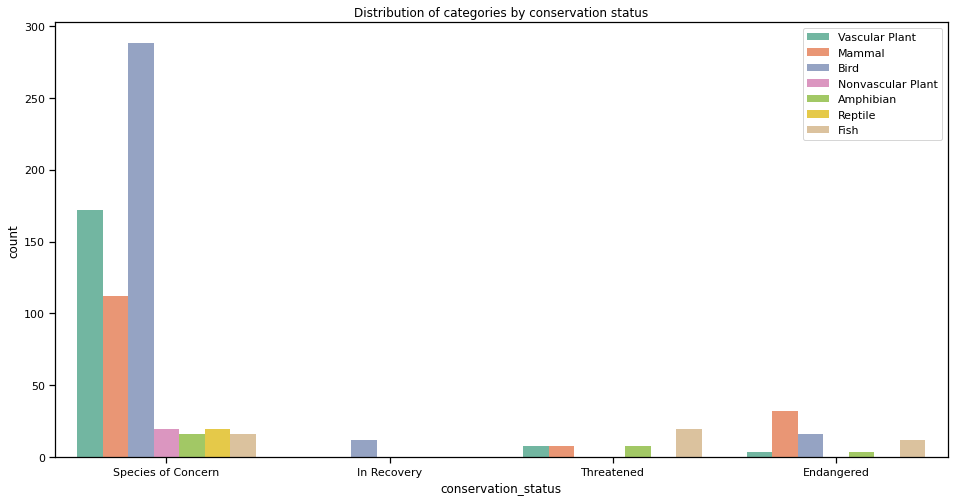

In [32]:
fig = plt.figure(figsize=(16, 8))
sns.countplot(x='conservation_status', data=observations, hue='category', order=order)
plt.legend(loc='upper right')
plt.title('Distribution of categories by conservation status')

Text(0.5, 1.0, 'Number of species by conservation status by category')

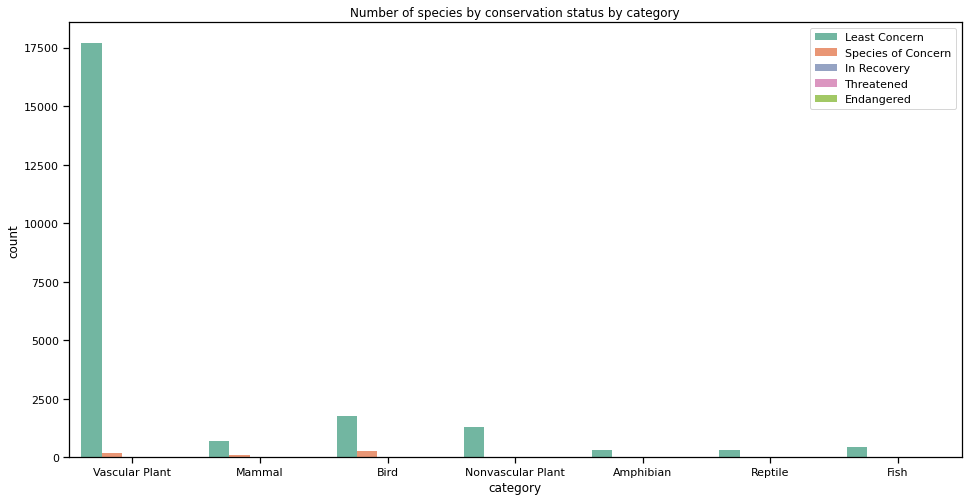

In [33]:
fig = plt.figure(figsize=(16, 8))
sns.countplot(x='category', data=observations, hue='conservation_status')
plt.legend(loc='upper right')
plt.title('Number of species by conservation status by category')